In [1]:
import os

def traverse_folders(root_folder):
    folder_dict = {}

    for root, dirs, files in os.walk(root_folder):
        folder_name = os.path.basename(root)
        file_paths = [os.path.join(root, name) for name in files]
        if file_paths: 
            folder_dict[folder_name] = file_paths
    
    return folder_dict
root_folder = r'C:\Users\ASUS\Desktop\VS code\ML-AI\cdla\dataset'
folder_contents = traverse_folders(root_folder)
folder_contents

{'angelina_jolie': ['C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\cdla\\dataset\\angelina_jolie\\image_1011_face0.jpg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\cdla\\dataset\\angelina_jolie\\image_111_face0.jpg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\cdla\\dataset\\angelina_jolie\\image_1211_face0.jpg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\cdla\\dataset\\angelina_jolie\\image_1311_face0.jpg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\cdla\\dataset\\angelina_jolie\\image_1411_face0.jpg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\cdla\\dataset\\angelina_jolie\\image_1511_face0.jpg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\cdla\\dataset\\angelina_jolie\\image_1711_face0.jpg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\cdla\\dataset\\angelina_jolie\\image_2111_face0.jpg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\cdla\\dataset\\angelina_jolie\\image_2311_face0.jpg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\cdla\\dataset\\angelina_jolie\\image_2511_face0

In [2]:
class_dict = {}
count = 0
for celebrity_name in folder_contents.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'angelina_jolie': 0,
 'anne_hathaway': 1,
 'ariana_grande': 2,
 'Brad pitt': 3,
 'christian_bale': 4,
 'cillian_murphy': 5,
 'emma_watson': 6,
 'hugh_jackman': 7,
 'jennifer_lawrence': 8,
 'johny depp': 9,
 'keanu_reeves': 10,
 'Kendall_jenner': 11,
 'margot_robbie': 12,
 'messi': 13,
 'ms_dhoni': 14,
 'neymar': 15,
 'olivia_rodrigo': 16,
 'Roanldo': 17,
 'robert downey': 18,
 'sachin_tendulkar': 19,
 'scarlett_johansson': 20,
 'selena_gomez': 21,
 'shawn_mendes': 22,
 'taylor_swift': 23,
 'Tom Cruise': 24,
 'virat_kohli': 25}

In [3]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(128, 128), grayscale=True):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to read image: {image_path}")
        return None
    
    if grayscale:
        image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    image =cv2.resize(image, target_size)
    
    image=image / 255.0
    
    if grayscale:
        image=np.expand_dims(image, axis=-1)
    
    return image


In [4]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

images = []
labels = []

for celeb_name, image_paths in folder_contents.items():
    for image_path in image_paths:
        preprocessed_image = preprocess_image(image_path)
        if preprocessed_image is not None:
            images.append(preprocessed_image)
            labels.append(celeb_name)

images = np.array(images)
labels = np.array(labels)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

one_hot_labels = to_categorical(encoded_labels)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {one_hot_labels.shape}")


Images shape: (1813, 128, 128, 1)
Labels shape: (1813, 26)


In [7]:
print(images)

[[[[0.74117647]
   [0.7372549 ]
   [0.71372549]
   ...
   [0.8       ]
   [0.78039216]
   [0.78039216]]

  [[0.74901961]
   [0.74901961]
   [0.72156863]
   ...
   [0.81568627]
   [0.8       ]
   [0.79607843]]

  [[0.77647059]
   [0.77254902]
   [0.74117647]
   ...
   [0.85490196]
   [0.84705882]
   [0.84705882]]

  ...

  [[0.01176471]
   [0.01176471]
   [0.01176471]
   ...
   [0.60784314]
   [0.50980392]
   [0.50196078]]

  [[0.00392157]
   [0.00392157]
   [0.00392157]
   ...
   [0.58039216]
   [0.48235294]
   [0.4745098 ]]

  [[0.00392157]
   [0.00392157]
   [0.00392157]
   ...
   [0.56862745]
   [0.47058824]
   [0.46666667]]]


 [[[0.12941176]
   [0.12941176]
   [0.13333333]
   ...
   [0.09411765]
   [0.09019608]
   [0.08627451]]

  [[0.12156863]
   [0.12156863]
   [0.12156863]
   ...
   [0.09411765]
   [0.09411765]
   [0.09411765]]

  [[0.10588235]
   [0.10588235]
   [0.10196078]
   ...
   [0.09411765]
   [0.10196078]
   [0.10588235]]

  ...

  [[0.08627451]
   [0.08627451]
   [0.0

In [5]:
from sklearn.model_selection import train_test_split

test_size = 0.1  
validation_size = 0.1  

X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=test_size, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size / (1 - test_size), random_state=42)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Train set: (1449, 128, 128, 1), (1449, 26)
Validation set: (182, 128, 128, 1), (182, 26)
Test set: (182, 128, 128, 1), (182, 26)


In [8]:
import tensorflow as tf
'''
This is a convolutional neural network (CNN) with three Conv2D layers, ReLU activations, max-pooling layers, a dense layer with 512 neurons, dropout for regularization, and a softmax output layer for classifying 26 classes, processing grayscale images of shape 128x128.
'''
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(26, activation='softmax')  
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 18s 366ms/step - accuracy: 0.0626 - loss: 3.2742 - val_accuracy: 0.2582 - val_loss: 2.7115
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 345ms/step - accuracy: 0.2388 - loss: 2.6120 - val_accuracy: 0.3791 - val_loss: 2.2125
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 368ms/step - accuracy: 0.4083 - loss: 1.9819 - val_accuracy: 0.4780 - val_loss: 1.9132
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 365ms/step - accuracy: 0.5022 - loss: 1.6251 - val_accuracy: 0.5385 - val_loss: 1.6397
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 369ms/step - accuracy: 0.6164 - loss: 1.2421 - val_accuracy: 0.5495 - val_loss: 1.6826
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 366ms/step - accuracy: 0.6801 - loss: 1.0381 - val_accuracy: 0.5934 - val_loss: 1.4919
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 366ms/step - accuracy: 0.7485 - loss: 0.8082 - val_accuracy: 0.5714 - val_loss: 1.6565
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 361ms/step - accuracy: 0.7971 - loss: 0.6283 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[5.0173909e-08 2.1061928e-07 3.8267598e-09 1.5204954e-11 1.0601588e-05
  8.8618440e-10 9.8969191e-01 1.5513586e-09 1.8793537e-14 1.5327039e-04
  1.4588413e-08 1.0063373e-02 3.0596493e-06 1.1064155e-10 8.9408900e-07
  8.6486747e-09 7.3498563e-09 8.0696667e-09 9.1643542e-06 6.2430695e-07
  5.0735260e-11 5.0144710e-05 1.6641301e-05 7.2621978e-11 3.0517093e-09
  5.1678111e-12]]
['Brad pitt', 'Kendall_jenner', 'Roanldo', 'Tom Cruise', 'angelina_jolie', 'anne_hathaway', 'ariana_grande', 'christian_bale', 'cillian_murphy', 'emma_watson', 'hugh_jackman', 'jennifer_lawrence', 'johny depp', 'keanu_reeves', 'margot_robbie', 'messi', 'ms_dhoni', 'neymar', 'olivia_rodrigo', 'robert downey', 'sachin_tendulkar', 'scarlett_johansson', 'selena_gomez', 'shawn_mendes', 'taylor_swift', 'virat_kohli']
Predicted Class: ariana_grande
Confidence: 98.97%


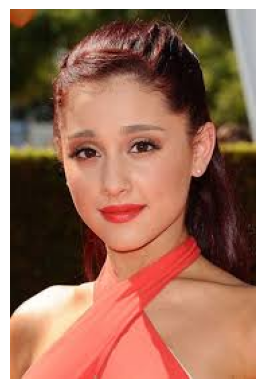

In [13]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

# Load your trained model (if not already loaded)
# model = tf.keras.models.load_model('path_to_your_model')

# Load class names (replace with your actual class names)
class_names =  [
    'Brad pitt',      # Index 0
    'Kendall_jenner', # Index 1
    'Roanldo',        # Index 2
    'Tom Cruise',     # Index 3
    'angelina_jolie', # Index 4
    'anne_hathaway',  # Index 5
    'ariana_grande',  # Index 6
    'christian_bale', # Index 7
    'cillian_murphy', # Index 8
    'emma_watson',    # Index 9
    'hugh_jackman',   # Index 10
    'jennifer_lawrence', # Index 11
    'johny depp',     # Index 12
    'keanu_reeves',   # Index 13
    'margot_robbie',  # Index 14
    'messi',          # Index 15
    'ms_dhoni',       # Index 16
    'neymar',         # Index 17
    'olivia_rodrigo', # Index 18
    'robert downey',  # Index 19
    'sachin_tendulkar', # Index 20
    'scarlett_johansson', # Index 21
    'selena_gomez',   # Index 22
    'shawn_mendes',   # Index 23
    'taylor_swift',   # Index 24
    'virat_kohli'     # Index 25
]
  # List of class names used for your model

# Initialize MTCNN face detector
detector = MTCNN()

# Function to detect and crop face
def detect_and_crop_face(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None

    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for MTCNN
    faces = detector.detect_faces(rgb_image)  # Detect faces

    if len(faces) == 0:
        print(f"No face detected in image: {image_path}")
        return None

    # Assuming the first detected face is the correct one (can be changed for multiple faces)
    x, y, width, height = faces[0]['box']
    x, y = max(0, x), max(0, y)  # Ensure coordinates are valid
    cropped_face = rgb_image[y:y + height, x:x + width]  # Crop the face from the image
    resized_face = cv2.resize(cropped_face, (128, 128))  # Resize to match model input size
    return resized_face

# Function to preprocess the image for prediction
def preprocess_image(cropped_face, is_grayscale=False):
    img_array = np.array(cropped_face)  # Convert cropped face to NumPy array
    
    if is_grayscale:
        img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    if is_grayscale:
        img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension if grayscale
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Function to predict the class of the image
def predict_image(model, image_path, class_names, is_grayscale=False):
    cropped_face = detect_and_crop_face(image_path)
    if cropped_face is None:
        return None, None  # Return if no face is detected
    
    img_array = preprocess_image(cropped_face, is_grayscale)  # Preprocess the cropped face
    predictions = model.predict(img_array)
    print(predictions)
    print(class_names)  
    predicted_class = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class]  
    return predicted_class_name, predictions[0][predicted_class]

image_path = r"C:\Users\ASUS\Downloads\images.jpg" 
predicted_class, confidence = predict_image(model, image_path, class_names, is_grayscale=True)


if predicted_class:
    # Print the result
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence * 100:.2f}%")

    # Optionally, display the image
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("No face detected in the image. Please try again with a valid image.")